**Импорт библиотек**

In [1]:
import pandas as pd
#Визуализация
import seaborn as sns
#Модель которую мы будем обучать 
from xgboost import XGBClassifier
#разбивает ваборку на тренировочную и тестовую для учета ошибки  
from sklearn.model_selection import train_test_split
#метрики,   accuracy_score - в процентном соотношении показывает точность модели от 0 до 100
from sklearn.metrics import accuracy_score

**Загрузка данных**

In [2]:
# загружаем тренировочную выборку по которой будем обучать модель
df_train = pd.read_csv('datasets/train.csv').set_index('id')
# загружаем искомую(тестовую) выборку по которой будем предсказывать
df_test = pd.read_csv('datasets/test.csv').set_index('id')

**Генерация переменных(фич)**

In [3]:
# поскольку мы предсказываем нелинеиную фигуру, добовляем новые переменные(полиномы)
def pipline2(dataset:pd.DataFrame)-> pd.DataFrame:
    """
    Данная функция генерирует дополнительные
    столбцы для предсказания на базе переменных x и y
    принимает датафрейм формата pd.DataFrame
    возвращает датафрейм формата pd.DataFrame
    """
    # переменные первого порядка
    dataset['xx'] = dataset['x'] * dataset['x'] 
    dataset['yy'] = dataset['y'] * dataset['y'] 
    dataset['xy'] = dataset['x'] * dataset['y']
    # переменные второго порядка
    dataset['xxy'] = dataset['x'] * dataset['x'] * dataset['y'] 
    dataset['yyx'] = dataset['y'] * dataset['y'] * dataset['x'] 
    dataset['xxx'] = dataset['x'] * dataset['x'] * dataset['x'] 
    dataset['yyy'] = dataset['y'] * dataset['y'] * dataset['y']
    
    return dataset
#Вызываем функцию для генерации значений переменных
df_train = pipline2(df_train)
df_test = pipline2(df_test)

**Визуализация**

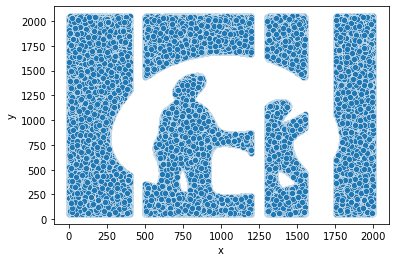

In [4]:
#Визуализируем нашу картину
#наша задача востановить данную картину
sns.scatterplot(x = df_train[df_train['c'] ==1]['x'],y = df_train[df_train['c'] ==1]['y']);

**Моделирование**

In [6]:
#перечень названий колонок
list_of_columns = df_train.columns
#в переменную X передаем все значения(переменные) помимо искомого с
X = df_train[list_of_columns.drop('c')]
#в переменную Y передаем с
Y = df_train[['c']]
#Делим выборку на 80%/20%
#на 80% данных будем обучатся
#на 20% данных будем валидироваться(проверять качество модели)
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [7]:
# инициализируем модель (с гиперпараметром max_depth = 16, опционально можно не указывать или указать любое число)
model = XGBClassifier()
# тренируем модель
model.fit(X_train, y_train)
# предсказываем на тестовой выборке(модель при обучении ее не видела)
y_pred = model.predict(X_test)
# Сравниваем реальные значения и предсказанные и высчитываем точность 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.04%


**Получение результатов**

In [8]:
# предсказываем
df_test['c'] = model.predict(df_test)
# Сохраняем результат
df_test['c'].reset_index().to_csv('try_5.csv',index  = False)

In [18]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

**хитрость**

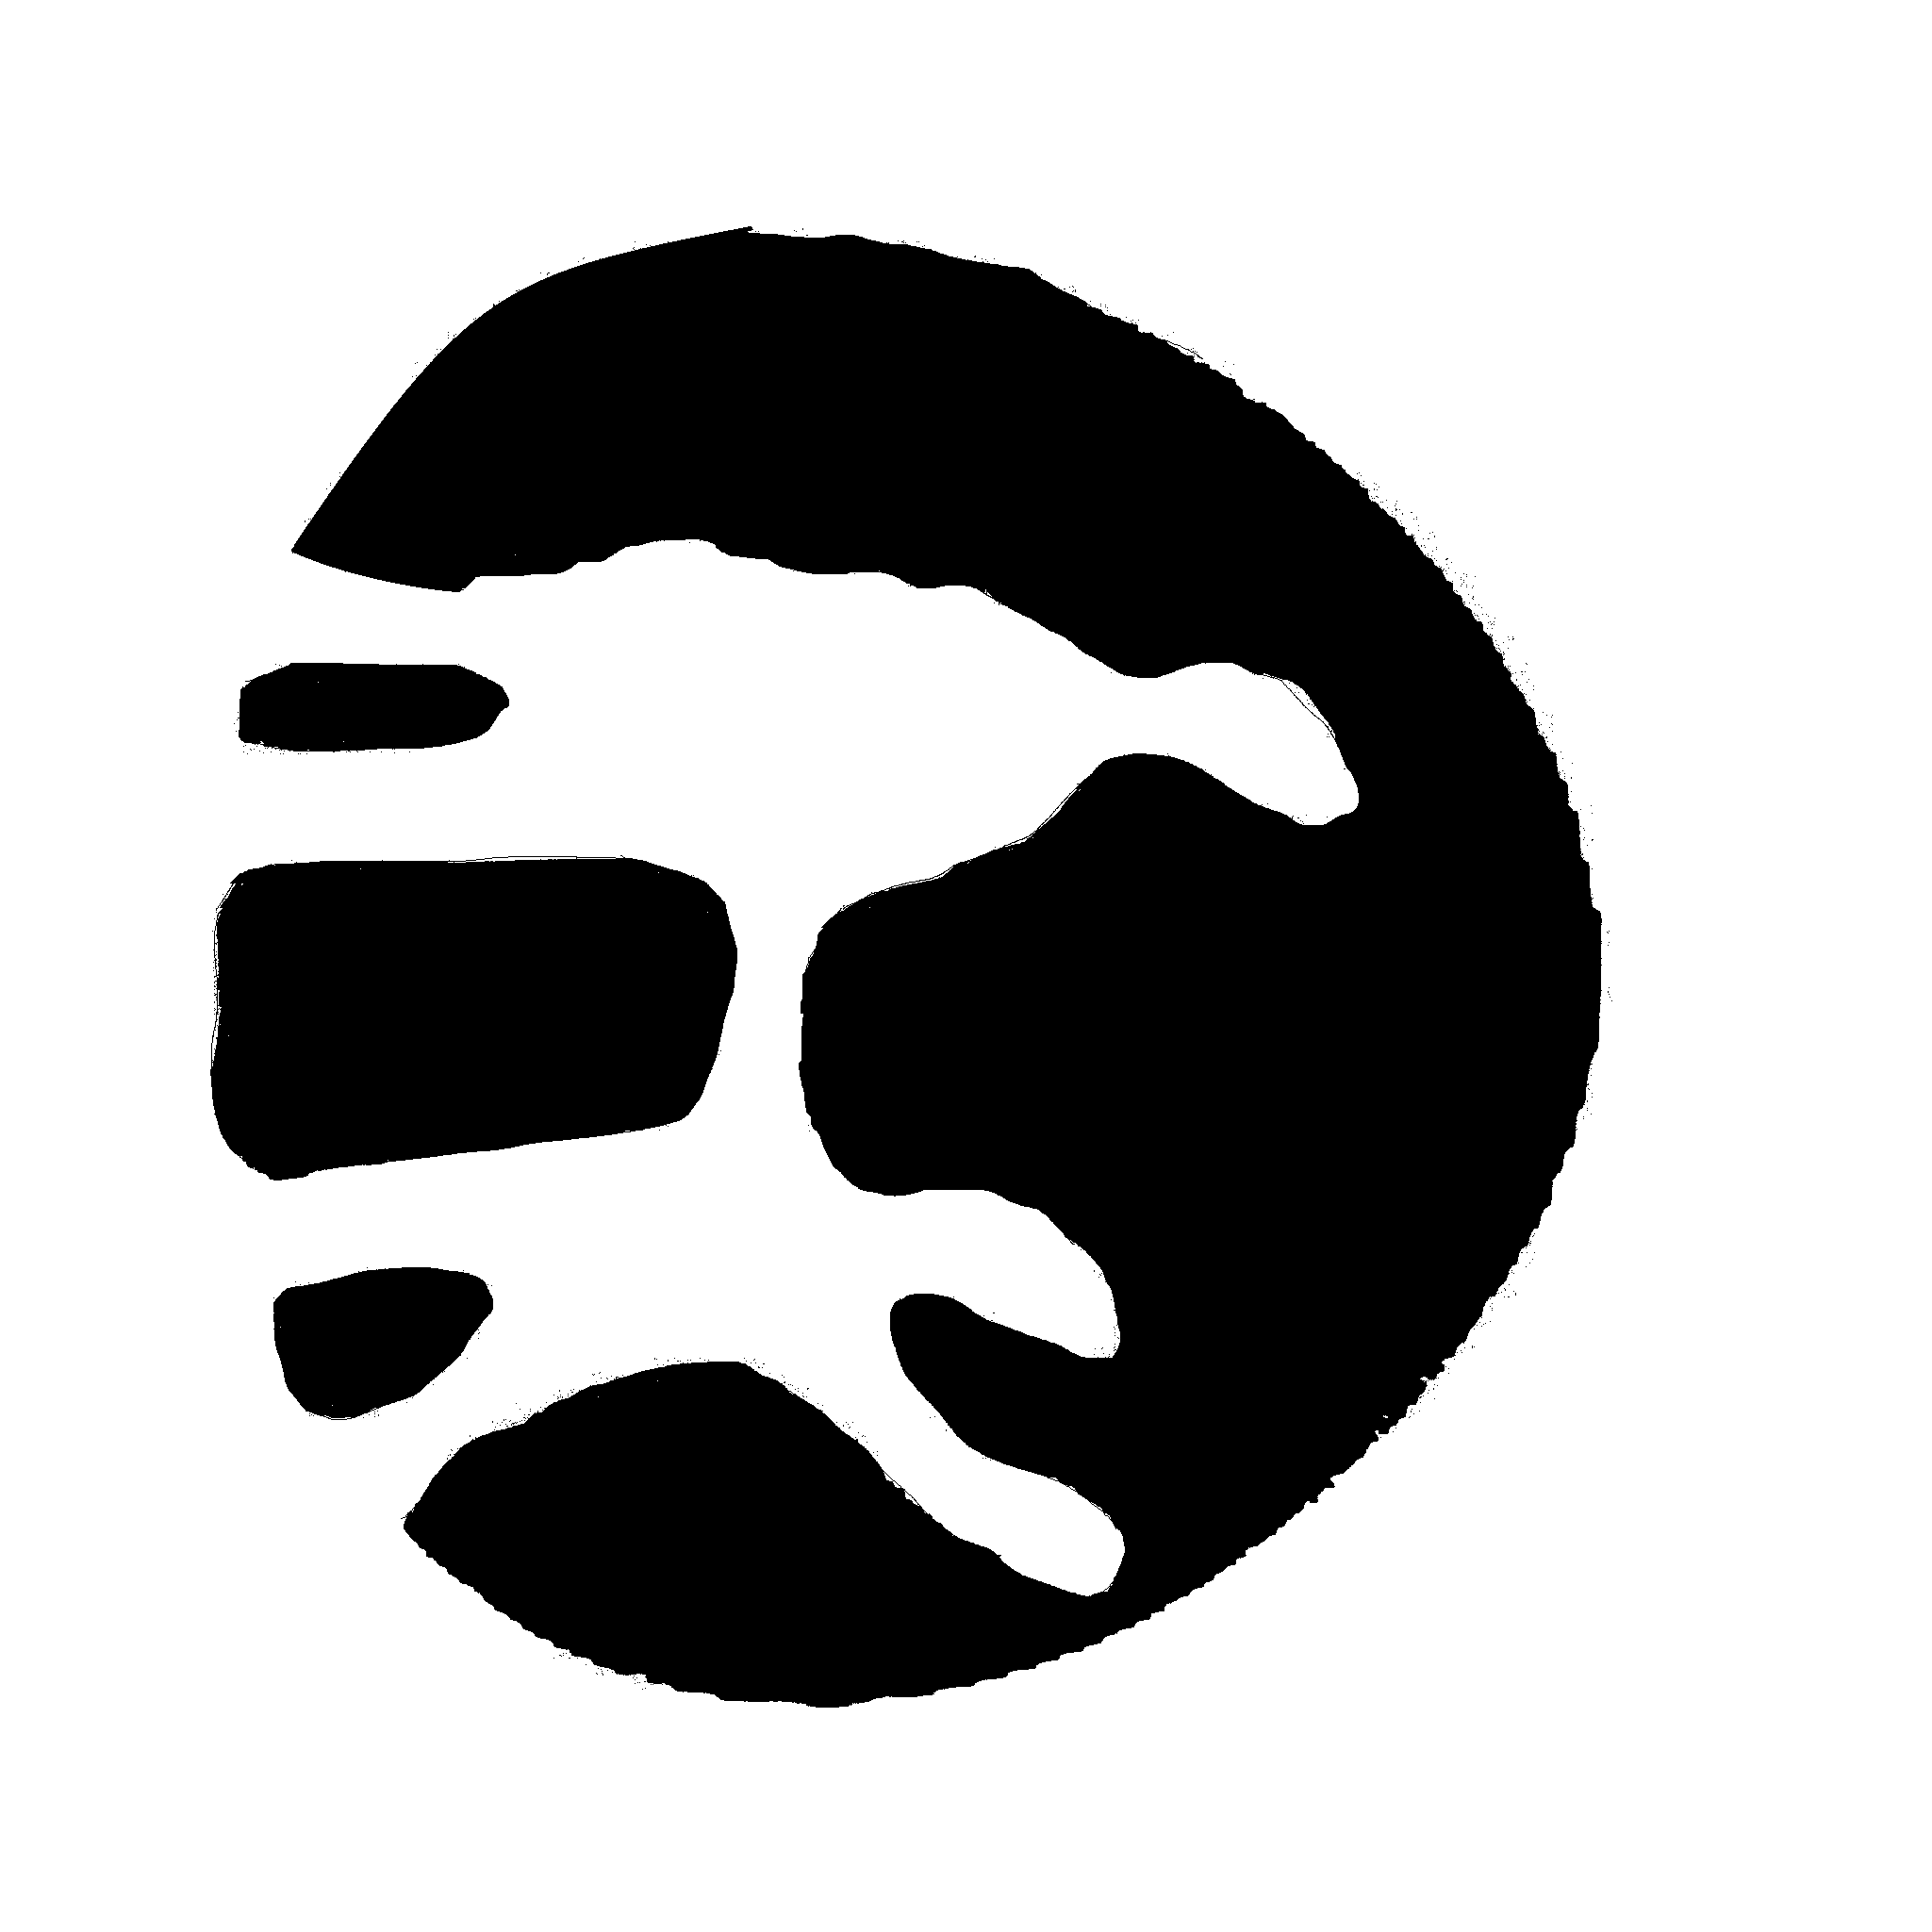